In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("hmeq_SMOTE.csv")

In [3]:
df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,TARGET
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0,1
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0,1
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0,1
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0,1
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0,0


In [4]:
X = df.drop('TARGET', axis=1)

In [5]:
y = df['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
model = DecisionTreeClassifier(max_depth=6)

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [9]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,6), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1440
           1       0.87      0.79      0.83      1423

    accuracy                           0.84      2863
   macro avg       0.84      0.84      0.84      2863
weighted avg       0.84      0.84      0.84      2863





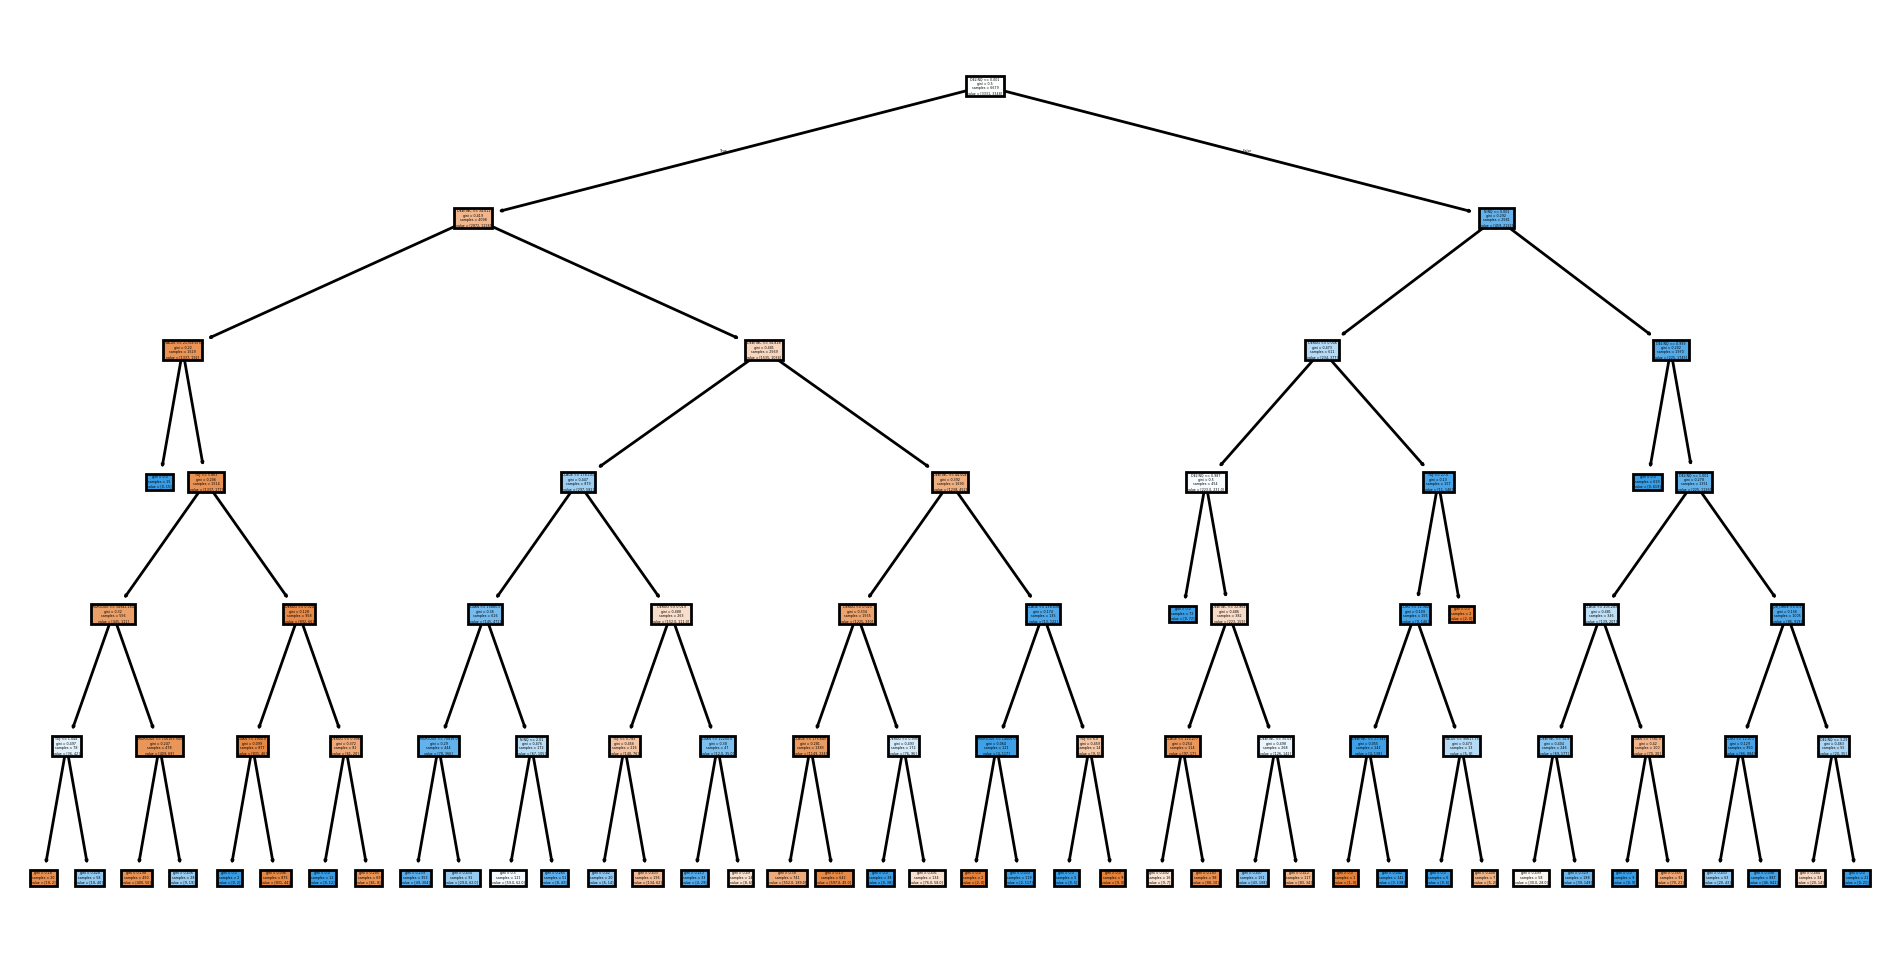

In [10]:
report_model(model)

In [11]:
imp_feats = pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

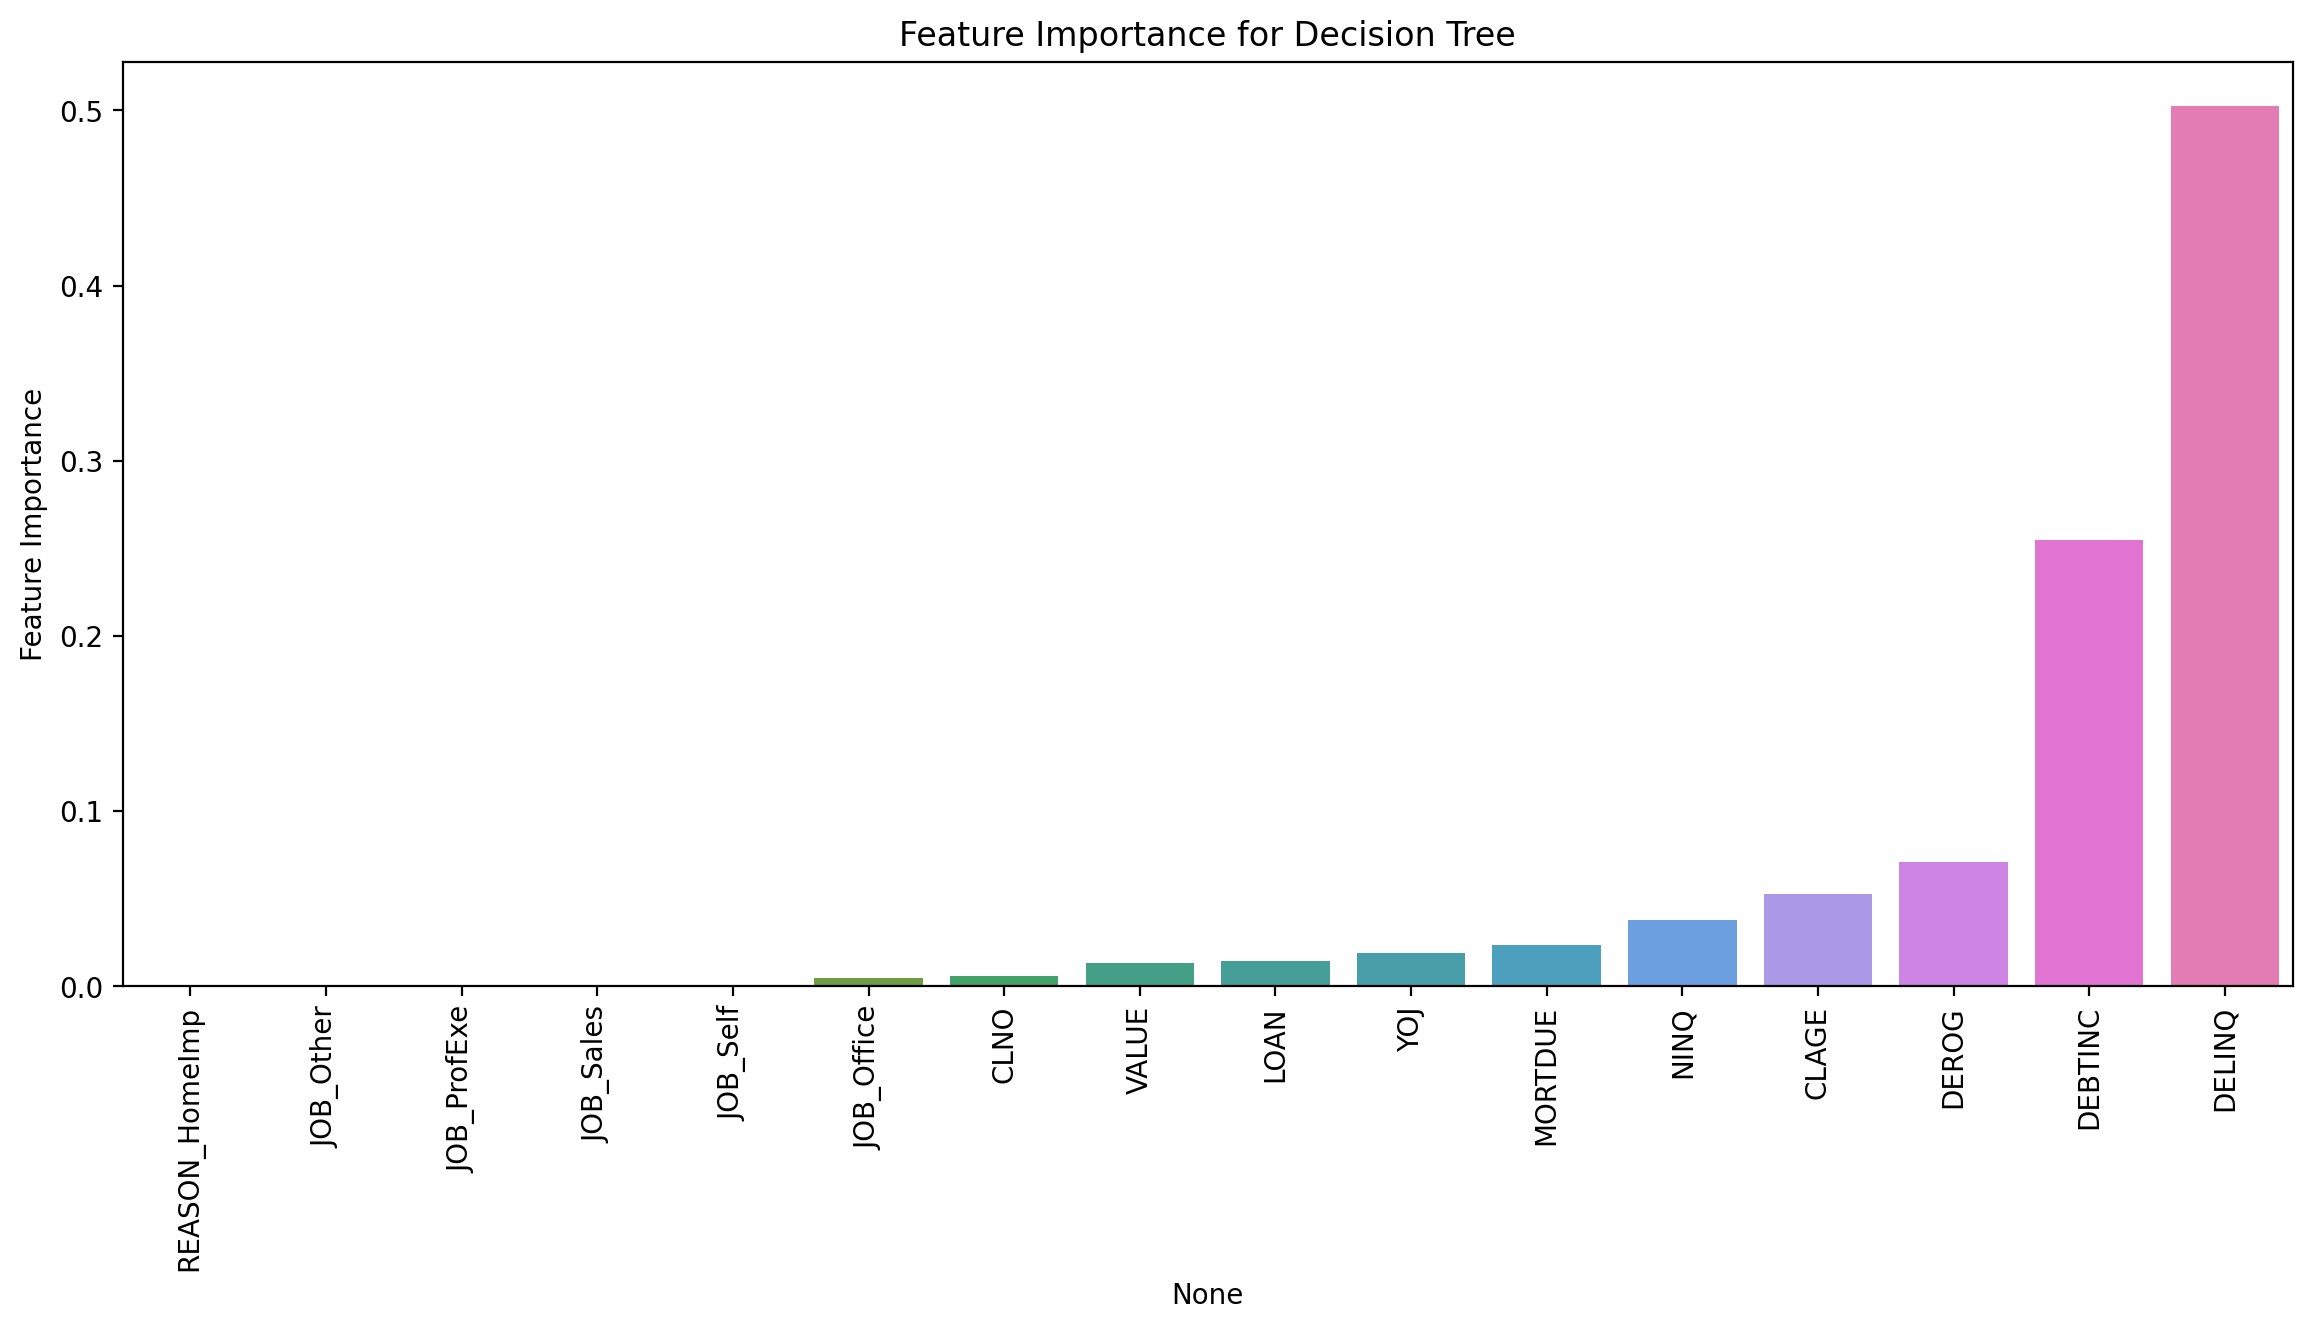

In [12]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance', 
            hue=imp_feats.sort_values('Feature Importance').index)
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [39]:
# using 'entropy' criterion

In [33]:
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [35]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1440
           1       0.90      0.78      0.84      1423

    accuracy                           0.85      2863
   macro avg       0.85      0.85      0.85      2863
weighted avg       0.85      0.85      0.85      2863





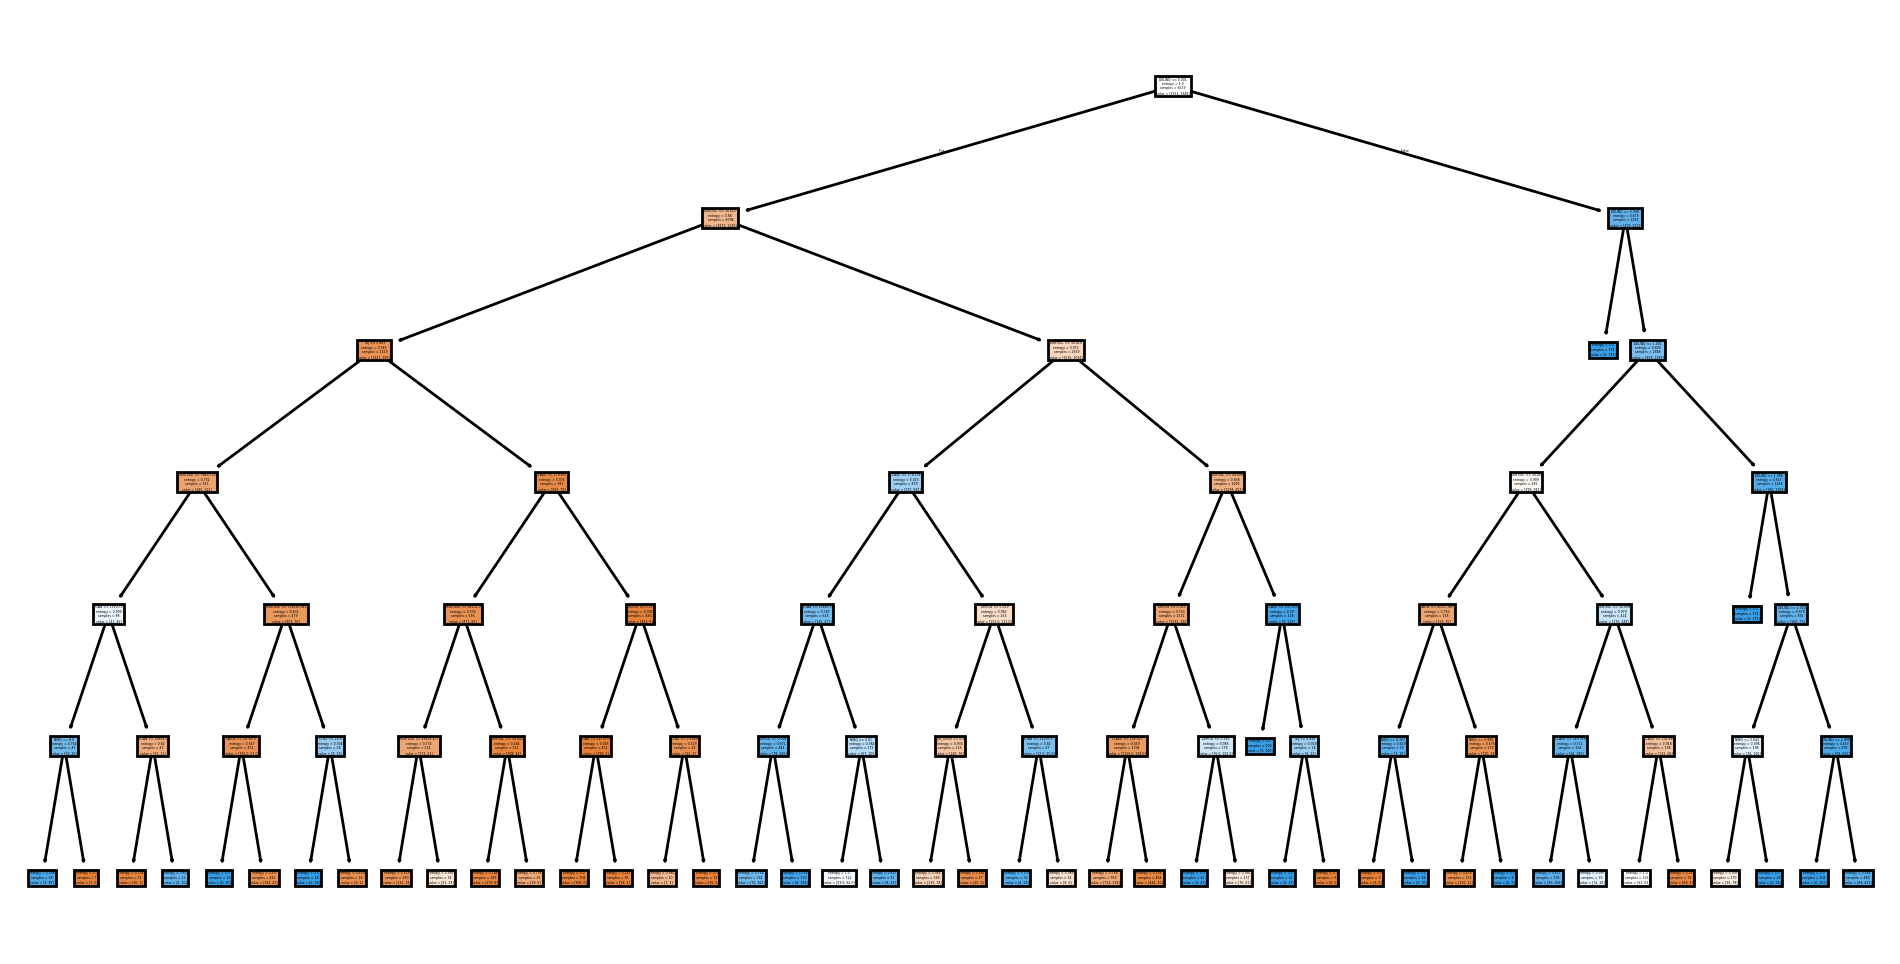

In [37]:
report_model(entropy_model)